In [1]:
import torch
import numpy as np
from matplotlib.pylab import plt
import copy

In [25]:
# Generate synthetic data
np.random.seed(42)

num_samples = 30000
num_features = 2
num_clusters = 3

data = np.random.randn(num_samples, num_features)
data = torch.tensor(data, dtype=torch.float32)



Text(0.5, 1.0, 'data for clustering')

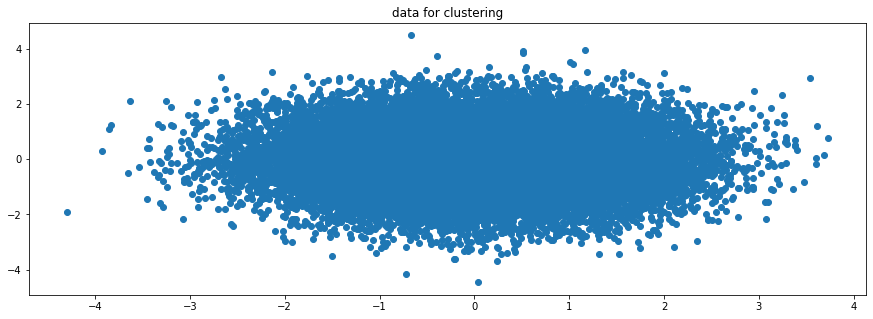

In [26]:
plt.figure(figsize=(15,5))
plt.scatter(data[:,0],data[:,1])
plt.title("data for clustering")

In [36]:
# Criterias for stopping 
num_epochs = 100
center_thr = 0.0



In [51]:
def check_center_movement(centers, previous, center_thr=0.1):

    distances = []
    distances = torch.sqrt(torch.sum((centers - previous) ** 2, dim=1))
    if distances.mean() <= center_thr:

        return True
    return False

def k_means(data, num_clusters, epochs,center_thr):
    # Initialize cluster centers randomly
    centers = data[np.random.choice(num_samples, num_clusters, replace=False)]

    new_clusters = []
    for epoch in range(num_epochs):
        # Calculate distances between data points and cluster centers
        distances = torch.sqrt(torch.sum((data[:, None] - centers[None, :]) ** 2, dim=2)) # notice the added dimension to allow broadcasting 

        # Assign each data point to the nearest cluster
        assignments = torch.argmin(distances, dim=1)
        previouse_centers = copy.deepcopy(centers)

        # Update cluster centers
        new_clusters = []
        for cluster_idx in range(num_clusters):
            cluster_data = data[assignments == cluster_idx]
            if len(cluster_data) > 0:
                centers[cluster_idx] = cluster_data.mean(dim=0)
                new_clusters.append(cluster_data)
        moved = check_center_movement(centers, previouse_centers, center_thr)
        if moved and epoch>3:
            print("centers are not moving much, breaking early at epoch {}".format(epoch))
            break
    
    return new_clusters, centers



In [52]:

new_clusters, new_centers  = k_means(data, num_clusters, epochs= num_epochs ,center_thr=center_thr)


centers are not moving much, breaking early at epoch 54


Text(0.5, 1.0, 'data for clustering')

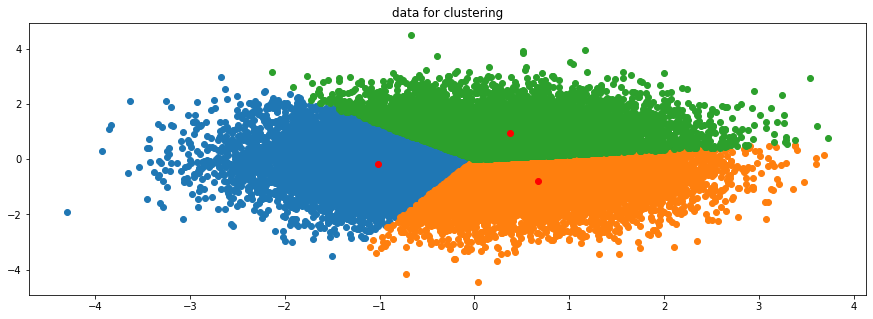

In [53]:
plt.figure(figsize=(15,5))
plt.scatter(new_clusters[0][:,0],new_clusters[0][:,1])
plt.scatter(new_clusters[1][:,0],new_clusters[1][:,1])
plt.scatter(new_clusters[2][:,0],new_clusters[2][:,1])

plt.scatter(new_centers[:,0].detach().numpy(),new_centers[:,1].detach().numpy(),c='r')
plt.title("data for clustering")